# Entropy
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In information theory, information entropy is the log-base-2 of the number of possible outcomes for a message.

For an image, local entropy is related to the complexity contained in a given neighborhood, typically defined by a structuring element. The entropy filter can detect subtle variations in the local gray level distribution.

In the first example, the image is composed of two surfaces with two slightly different distributions. The image has a uniform random distribution in the range [-14, +14] in the middle of the image and a uniform random distribution in the range [-15, 15] at the image borders, both centered at a gray value of 128. To detect the central square, we compute the local entropy measure using a circular structuring element of a radius big enough to capture the local gray level distribution. The second example shows how to detect texture in the camera image using a smaller structuring element.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

### First example: object detection

In [2]:
noise_mask = np.full((128, 128), 28, dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

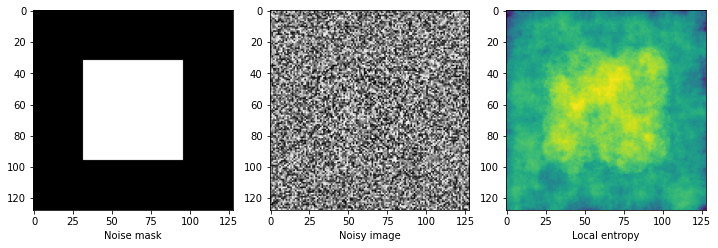

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

ax0.imshow(noise_mask, cmap='gray')
ax0.set_xlabel("Noise mask")
ax1.imshow(img, cmap='gray')
ax1.set_xlabel("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_xlabel("Local entropy")

fig.tight_layout()

### Second example: texture detection

In [4]:
image = img_as_ubyte(data.camera())

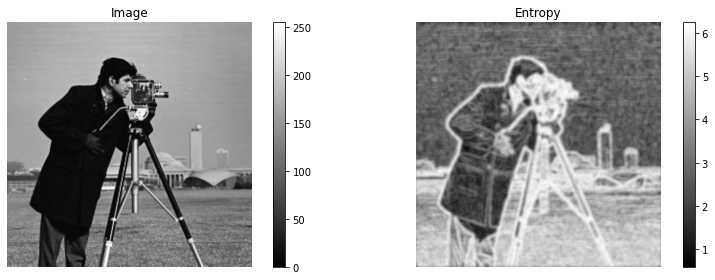

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()